# Q1

# b

In [1]:
import pandas as pd
red = pd.read_csv("/Users/kisha/OneDrive/Desktop/ML/red_wine.csv")
white = pd.read_csv("/Users/kisha/OneDrive/Desktop/ML/white_wine.csv")
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
red.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# C

# i) Random Forest

In [4]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(max_features = "log2") # first I ran hyperparameter grid to find "log2"

In [5]:
x1 = red.drop(columns = "quality")
y1 = red["quality"]


In [6]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.2,random_state = 42)
rf_red= rf.fit(x1_train,y1_train)
y1_pred = rf_red.predict(x1_test)
r2_score(y1_test,y1_pred) 

0.543051629582032

In [7]:
# grid search for hyperparameter tuning

from sklearn.model_selection import train_test_split, GridSearchCV

# Define hyperparameters grid
param_grid = {
   
    
'max_features': ['auto', 'sqrt', 'log2']
    
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x1_train, y1_train)

# Find best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate model performance
best_model = grid_search.best_estimator_
accuracy = best_model.score(x1_test, y1_test)
print("Model Accuracy:", accuracy)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\kisha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kisha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kisha\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\kisha\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kisha\anaconda3\Lib\site-packages\sk

Best Hyperparameters: {'max_features': 'log2'}
Model Accuracy: 0.5382113898892691


In [8]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
x2 = white.drop(columns = "quality")
y2 = white["quality"]


In [10]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.2,random_state = 42
                                                    )
rf_white = rf.fit(x2_train,y2_train)
y2_pred = rf_white.predict(x2_test)
r2_score(y2_test,y2_pred) 



0.5637800764717587

# ii) Support vector regression with RBF kernel

In [11]:
from sklearn.svm import SVR

In [12]:
# train model for red wine using svr

svr = SVR(kernel = "rbf",C = 100, gamma = "scale")
svr_red = svr.fit(x1_train,y1_train)
y3_pred = svr_red.predict(x1_test)
r2_score(y1_test,y3_pred)

0.39212038353846757

In [13]:
# grid search for hyperparameter tuning

param_grid = {
   'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001] # Kernel coefficient

}

# Perform Grid Search
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x1_train, y1_train)

# Find best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate model performance
best_model = grid_search.best_estimator_
accuracy = best_model.score(x1_test, y1_test)
print("Model Accuracy:", accuracy)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 100, 'gamma': 'scale'}
Model Accuracy: 0.39212038353846757


In [14]:
# train model using svr for white wine
svr_white = svr.fit(x2_train,y2_train)  
y4_pred = svr_white.predict(x2_test)
r2_score(y2_test,y4_pred)

0.2870743181905241

# d

In [15]:
# After training the model
feature_importances = rf.feature_importances_

# Print feature importances for random forest
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.06674089323374943
Feature 2: 0.10913571944805714
Feature 3: 0.0687461084674729
Feature 4: 0.07519693158962082
Feature 5: 0.0849286286376736
Feature 6: 0.10352094010759734
Feature 7: 0.08253032002477352
Feature 8: 0.10806207298186388
Feature 9: 0.07252574698758237
Feature 10: 0.06263219220283968
Feature 11: 0.16598044631876926


In [16]:
# After training the SVR model
if svr.kernel == 'linear':
    feature_importances = svr.coef_

    # Print feature importances
    for i, importance in enumerate(feature_importances):
        print(f"Feature {i+1}: {importance}")
else:
    print("Feature importance is not directly available for SVR with non-linear kernels.")

Feature importance is not directly available for SVR with non-linear kernels.


# e

In [17]:
# I am using random forest to check the model applicability
# applicability of 2nd model in 1st
y3_pred = rf_red.predict(x2_test)
r2_score(y2_test,y3_pred) 

0.5637800764717587

In [18]:
# applicability of 1st model in 2nd

y4_pred = rf_white.predict(x1_test)
r2_score(y1_test,y4_pred) 

-0.5686484257086926

we can use 1st model for both but not 2nd.

 # Q2

# a


In [19]:
!pip install xlrd
mice = pd.read_excel("C:/Users/kisha/OneDrive/Desktop/ML/Data_Cortex_Nuclear.xls")

# b


In [20]:
mice.shape

(1080, 82)

In [21]:
mice.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [22]:
mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [42]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean")

In [57]:
x = mice.iloc[:,1:78]
y = mice["Genotype"]


In [54]:
imputer.fit(x)

SimpleImputer()

In [53]:
x_imputed = imputer.transform(x) # numpy array

In [50]:
x_new = pd.DataFrame(x_imputed, columns=x.columns) # converting x_imputed back to dataframe

  # c

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [92]:
# classification using rf
rf_classifier = RandomForestClassifier(random_state=56) # gpt 56 from grid search

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)


In [93]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=56)

In [94]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9953703703703703


In [90]:
# grid search for rf
param_grid = {
    
    'random_state': [10,14,32,42,56,79,93,194,374,637]  # Grid search for random_state
}

#  Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

#  Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

#  Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



Best Parameters: {'random_state': 56}
Best Score: 0.9895886543890308


In [74]:
# classification using svm
from sklearn.svm import SVC

In [88]:
svm_classifier = SVC(kernel='rbf', random_state=10) # I found best random_state 10 using grid search
svm_classifier.fit(X_train, y_train)

SVC(random_state=10)

In [89]:
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8611111111111112


In [95]:
# grid search for hyperparameter tuning (svc)
param_grid = {
    
    'random_state': [10,14,32,42,56,79,93,194,374,637]  # Grid search for random_state
}

#  Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

#  Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

#  Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



Best Parameters: {'random_state': 10}
Best Score: 0.7754200833445355


 # d

In [101]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
svm_classifier_linear = SVC(kernel='linear') # I used linear kernel becuase rbf throwing error

In [102]:
rfecv = RFECV(estimator=svm_classifier_linear, cv=5) #Initialize RFECV

In [103]:
rfecv.fit(X_train, y_train )#Fit RFECV to the training data

RFECV(cv=5, estimator=SVC(kernel='linear'))

In [105]:
selected_features = x_new.columns[rfecv.support_] #Get the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N',
       'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N',
       'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N',
       'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N',
       'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N',
       'S6_N', 'ADARB1_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N',
       'Tau_N', 'GFAP_N', 'GluR3_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N'],
      dtype='object')


In [106]:
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

In [107]:
svm_classifier_linear.fit(X_train_selected, y_train)

SVC(kernel='linear')

In [108]:
y_pred = svm_classifier_linear.predict(X_test_selected)


In [109]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) # accuracy inhanced

Accuracy: 0.9722222222222222


 # Q 3

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode


    
                
   

# a

In [129]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = "C:/Users/kisha/hymenoptera_data/hymenoptera_data"
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes


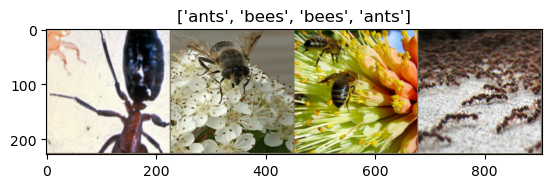

In [130]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [131]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [132]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

# b

In [136]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

def extract_resnet_features(image_path):
    # Load pre-trained ResNet18 model
    model = models.resnet18(pretrained=True)
    # Remove the final fully connected layer
    model = torch.nn.Sequential(*(list(model.children())[:-1]))
    # Set model to evaluation mode
    model.eval()

    # Define image transformations
    image_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load and transform the input image
    image = Image.open(image_patsh).convert('RGB')
    image = image_transforms(image).unsqueeze(0)  # Add batch dimension

    # Extract features
    with torch.no_grad():
        features = model(image)

    # Reshape features
    features = features.squeeze().numpy()

    return features

#Example usage:
image_path = "C:/Users/kisha/hymenoptera_data/hymenoptera_data/train/ants/0013035.jpg"
features = extract_resnet_features(image_path)
print("Shape of extracted features:", features.shape)

Shape of extracted features: (512,)


# c

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score

# Assuming train_features is Nx512 dimensional array of ResNet18 features
# And train_labels is the corresponding labels
train_features = extract_resnet_features(inputs)

# Convert classes tensor to numpy array
train_labels = classes.numpy()
# Convert labels to one-hot encoding
num_classes = len(np.unique(train_labels))
one_hot_labels = np.eye(num_classes)[train_labels]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features, one_hot_labels, test_size=0.2, random_state=42)

# SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

# Convert predictions back to class labels
svr_pred_labels = np.argmax(svr_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate accuracy and F1 score for SVR
svr_accuracy = accuracy_score(y_test_labels, svr_pred_labels)
svr_f1_score = f1_score(y_test_labels, svr_pred_labels, average='weighted')

print("SVR Accuracy:", svr_accuracy)
print("SVR F1 Score:", svr_f1_score)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Convert predictions back to class labels
rf_pred_labels = np.argmax(rf_pred, axis=1)

# Calculate accuracy and F1 score for Random Forest
rf_accuracy = accuracy_score(y_test_labels, rf_pred_labels)
rf_f1_score = f1_score(y_test_labels, rf_pred_labels, average='weighted')

print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1_score)

AttributeError: 'Tensor' object has no attribute 'read'